In [53]:
from astropy.modeling import models, Fittable1DModel, Parameter
from astropy.modeling.fitting import LevMarLSQFitter
import astropy.units as u
import astropy.constants as const
from astropy.io import fits

from spectacle.core.spectrum import Spectrum1D
from spectacle.modeling.custom import Masker
from spectacle.modeling.fitters import MCMCFitter
from spectacle.analysis.line_finder import LineFinder
from spectacle.io.registries import line_registry

import numpy as np
import matplotlib.pyplot as plt

In [54]:
%matplotlib notebook

In [55]:
wavelength = np.linspace(1210, 1220, 1000) * u.Angstrom
velocity = np.linspace(-400, 800, 1000) * u.Unit("km/s")
redshift = 2

dispersion = velocity

with fits.open("/Users/nearl/Downloads/hlsp_misty_foggie_halo008508_rd0020_i021.8_dx44.99_v2_los.fits") as hdulist:
    y = hdulist[4].data['flux']
    dispersion = hdulist[4].data['wavelength'] * u.Unit('Angstrom')
    line_name = hdulist[4].header['LINENAME']

In [56]:
spectrum = Spectrum1D(ion=line_name, redshift=redshift)
spectrum.add_line(v_doppler=9e6 * u.Unit('cm/s'))
spectrum.add_line(v_doppler=3.5e6 * u.Unit('cm/s'), delta_v=290 * u.Unit('km/s'))
# dispersion = spectrum._redshift_model.inverse(dispersion)

# print(dispersion[0])
print(dispersion)
# y = spectrum.optical_depth(dispersion)

INFO:root:Found line with name 'CII1335' from given name 'C II 1335'.
INFO:root:Default continuum set to a Linear1D model.


[ 3995.52270508  3995.52270508  3995.52294922 ...,  4013.65649414
  4013.65649414  4013.65673828] Angstrom


Model: BaseSpectrumModel
Name: OpticalDepth
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] | [1] | [2] + [3] | [4]
Components: 
    [0]: <DispersionConvert(center=1334.5323 Angstrom)>

    [1]: <Redshift(z=-0.6666666666666667)>

    [2]: <TauProfile(lambda_0=1334.5323 Angstrom, f_value=0.1278, gamma=288000000.0, v_doppler=9000000.0 cm / s, column_density=10000000000000.0 1 / cm2, delta_v=0.0 cm / s, delta_lambda=0.0 Angstrom, name='CII1335')>

    [3]: <TauProfile(lambda_0=1334.5323 Angstrom, f_value=0.1278, gamma=288000000.0, v_doppler=3500000.0 cm / s, column_density=10000000000000.0 1 / cm2, delta_v=290.0 km / s, delta_lambda=0.0 Angstrom, name='CII1335')>

    [4]: <SmartScale(factor=1.0)>
Parameters:
     center_0       z_1       lambda_0_2 ... delta_v_3 delta_lambda_3 factor_4
     Angstrom                  Angstrom  ...   km / s     Angstrom            
    --------- --------------- ---------- ... --------- -------------- --------
    1334.5323 -0.666666666667 

<IPython.core.display.Javascript object>


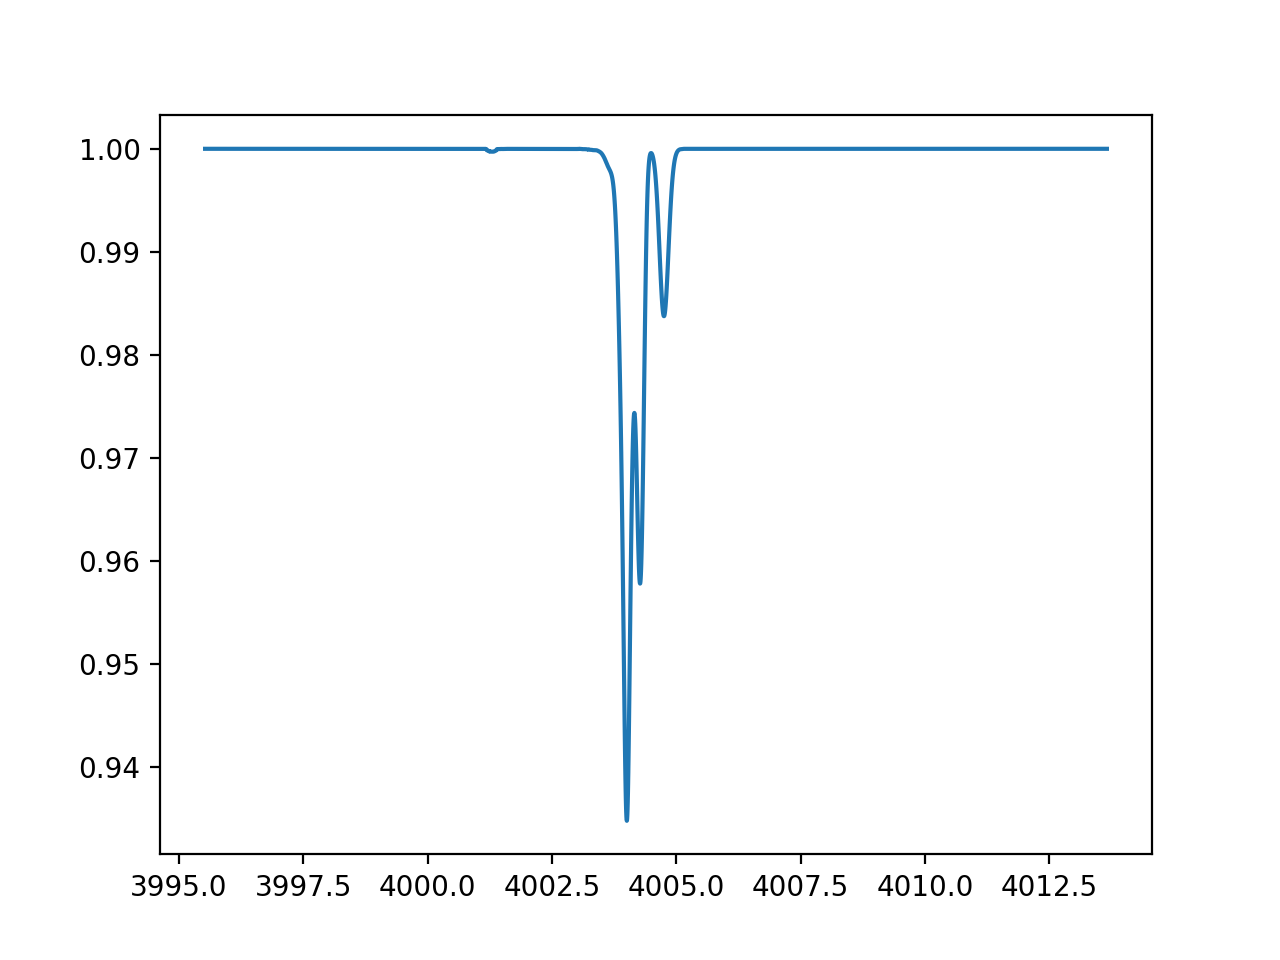

In [57]:
print(spectrum.optical_depth)

f, ax = plt.subplots()

ax.plot(dispersion, y)

In [58]:
line_finder = LineFinder(dispersion, y, ion_name=line_name, redshift=redshift, data_type='flux', threshold=0.1)
print(line_finder)
spec_mod = line_finder.fit()


INFO:root:Found line with name 'CII1335' from given name 'C II 1335'.
INFO:root:Relative tolerance: 0.010000, Absolute Tolerance: 0.000100
INFO:root:Threshold: 0.100000, Minimum Distance: 30.000000


Model: LineFinder
Inputs: ('x', 'y')
Outputs: ('y',)
Model set size: 1
Parameters:
      center  redshift threshold min_distance rel_tol abs_tol width
     Angstrom                                                      
    --------- -------- --------- ------------ ------- ------- -----
    1334.5323      2.0       0.1         30.0    0.01  0.0001  15.0


INFO:root:Found 3 peaks.
/Users/nearl/anaconda3/envs/spectacle_env/lib/python3.6/site-packages/astropy/modeling/functional_models.py:1129: RuntimeWarning: divide by zero encountered in true_divide
  X = (x - x_0) * 2 * sqrt_ln2 / fwhm_G
/Users/nearl/anaconda3/envs/spectacle_env/lib/python3.6/site-packages/astropy/modeling/functional_models.py:1131: RuntimeWarning: divide by zero encountered in true_divide
  Y = fwhm_L * sqrt_ln2 / fwhm_G
/Users/nearl/anaconda3/envs/spectacle_env/lib/python3.6/site-packages/astropy/modeling/functional_models.py:1134: RuntimeWarning: invalid value encountered in add
  V = np.sum((C * (Y - A) + D * (X - B))/(((Y - A) ** 2 + (X - B) ** 2)), axis=-1)
/Users/nearl/anaconda3/envs/spectacle_env/lib/python3.6/site-packages/astropy/modeling/functional_models.py:1134: RuntimeWarning: invalid value encountered in true_divide
  V = np.sum((C * (Y - A) + D * (X - B))/(((Y - A) ** 2 + (X - B) ** 2)), axis=-1)
/Users/nearl/anaconda3/envs/spectacle_env/lib/python3.6/si

Found peak at:  4004.0029296875 Angstrom
Found peak at:  4004.269287109375 Angstrom
Found peak at:  4004.75 Angstrom
Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.0030421497404 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 1.35793e+06 cm / s
	Column density: 6.83245e+10 1 / cm2
Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.2692091992058 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 662759 cm / s
	Column density: 2.23364e+10 1 / cm2
Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.749997992121 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 886470 cm / s
	Column density: 1.17172e+10 1 / cm2


INFO:root:Relative tolerance: 0.010000, Absolute Tolerance: 0.000100
INFO:root:Threshold: 0.100000, Minimum Distance: 30.000000
INFO:root:Found 3 peaks.
INFO:root:Default continuum set to a Linear1D model.


Found peak at:  4004.0029296875 Angstrom
Found peak at:  4004.269287109375 Angstrom
Found peak at:  4004.75 Angstrom
Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.0030421497404 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 1.35793e+06 cm / s
	Column density: 6.83245e+10 1 / cm2
Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.2692091992058 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 662759 cm / s
	Column density: 2.23364e+10 1 / cm2
Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.749997992121 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 886470 cm / s
	Column density: 1.17172e+10 1 / cm2


INFO:root:Relative tolerance: 0.010000, Absolute Tolerance: 0.000100
INFO:root:Threshold: 0.100000, Minimum Distance: 30.000000
INFO:root:Found 3 peaks.
INFO:root:Default continuum set to a Linear1D model.


Found peak at:  4004.0029296875 Angstrom
Found peak at:  4004.269287109375 Angstrom
Found peak at:  4004.75 Angstrom
Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.0030421497404 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 1.35793e+06 cm / s
	Column density: 6.83245e+10 1 / cm2
Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.2692091992058 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 662759 cm / s
	Column density: 2.23364e+10 1 / cm2
Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.749997992121 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 886470 cm / s
	Column density: 1.17172e+10 1 / cm2


INFO:root:Relative tolerance: 0.010000, Absolute Tolerance: 0.000100
INFO:root:Threshold: 0.100012, Minimum Distance: 30.000000
INFO:root:Found 3 peaks.
INFO:root:Default continuum set to a Linear1D model.


Found peak at:  4004.0029296875 Angstrom
Found peak at:  4004.269287109375 Angstrom
Found peak at:  4004.75 Angstrom
Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.0030421497404 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 1.35793e+06 cm / s
	Column density: 6.83245e+10 1 / cm2
Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.2692091992058 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 662759 cm / s
	Column density: 2.23364e+10 1 / cm2
Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.749997992121 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 886470 cm / s
	Column density: 1.17172e+10 1 / cm2


INFO:root:Relative tolerance: 0.010000, Absolute Tolerance: 0.000100
INFO:root:Threshold: 0.100000, Minimum Distance: 30.003662
INFO:root:Found 3 peaks.
INFO:root:Default continuum set to a Linear1D model.


Found peak at:  4004.0029296875 Angstrom
Found peak at:  4004.269287109375 Angstrom
Found peak at:  4004.75 Angstrom
Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.0030421497404 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 1.35793e+06 cm / s
	Column density: 6.83245e+10 1 / cm2
Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.2692091992058 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 662759 cm / s
	Column density: 2.23364e+10 1 / cm2
Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.749997992121 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 886470 cm / s


INFO:root:Relative tolerance: 0.010001, Absolute Tolerance: 0.000100
INFO:root:Threshold: 0.100000, Minimum Distance: 30.000000


	Column density: 1.17172e+10 1 / cm2


INFO:root:Found 3 peaks.
INFO:root:Default continuum set to a Linear1D model.


Found peak at:  4004.0029296875 Angstrom
Found peak at:  4004.269287109375 Angstrom
Found peak at:  4004.75 Angstrom
Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.0030421497404 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 1.35793e+06 cm / s
	Column density: 6.83245e+10 1 / cm2
Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.2692091992058 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 662759 cm / s
	Column density: 2.23364e+10 1 / cm2
Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.749997992121 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 886470 cm / s
	Column density: 1.17172e+10 1 / cm2

INFO:root:Relative tolerance: 0.010000, Absolute Tolerance: 0.000100
INFO:root:Threshold: 0.100000, Minimum Distance: 30.000000
INFO:root:Found 3 peaks.
INFO:root:Default continuum set to a Linear1D model.



Found peak at:  4004.0029296875 Angstrom
Found peak at:  4004.269287109375 Angstrom
Found peak at:  4004.75 Angstrom
Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.0030421497404 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 1.35793e+06 cm / s
	Column density: 6.83245e+10 1 / cm2
Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.2692091992058 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 662759 cm / s
	Column density: 2.23364e+10 1 / cm2
Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.749997992121 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 886470 cm / s
	Column density: 1.17172e+10 1 / cm2


INFO:root:Relative tolerance: 0.010000, Absolute Tolerance: 0.000100
INFO:root:Threshold: 0.100000, Minimum Distance: 30.000000
INFO:root:Found 3 peaks.
INFO:root:Default continuum set to a Linear1D model.


Found peak at:  4004.0029296875 Angstrom
Found peak at:  4004.269287109375 Angstrom
Found peak at:  4004.75 Angstrom
Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.0030421497404 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 1.35793e+06 cm / s
	Column density: 6.83245e+10 1 / cm2
Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.2692091992058 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 662759 cm / s
	Column density: 2.23364e+10 1 / cm2
Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.749997992121 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 886470 cm / s
	Column density: 1.17172e+10 1 / cm2

INFO:root:Default continuum set to a Linear1D model.



Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.0030421497404 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 1.35793e+06 cm / s
	Column density: 6.83245e+10 1 / cm2
Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.2692091992058 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 662759 cm / s
	Column density: 2.23364e+10 1 / cm2
Center: 1334.5323 Angstrom (4003.5969000000005 Angstrom)
Peak: 4004.749997992121 Angstrom, Center: 1334.5323 Angstrom
	Velocity: 886470 cm / s
	Column density: 1.17172e+10 1 / cm2


{'center_0': True, 'z_1': True, 'slope_2': True, 'intercept_2': True, 'lambda_0_3': True, 'f_value_3': True, 'gamma_3': True, 'v_doppler_3': False, 'column_density_3': False, 'delta_v_3': False, 'delta_lambda_3': True, 'lambda_0_4': True, 'f_value_4': True, 'gamma_4': True, 'v_doppler_4': False, 'column_density_4': False, 'delta_v_4': False, 'delta_lambda_4': True, 'lambda_0_5': True, 'f_value_5': True, 'gamma_5': True, 'v_doppler_5': False, 'column_density_5': False, 'delta_v_5': False, 'delta_lambda_5': True}
center_0        : 1.334532e+03
z_1             : -6.666667e-01
slope_2         : 0.000000e+00
intercept_2     : 1.000000e+00
lambda_0_3      : 1.334532e+03
f_value_3       : 1.278000e-01
gamma_3         : 2.880000e+08
v_doppler_3     : 1.357933e+06
column_density_3: 6.832446e+10
delta_v_3       : 0.000000e+00
delta_lambda_3  : 1.353807e-01
lambda_0_4      : 1.334532e+03
f_value_4       : 1.278000e-01
gamma_4         : 2.880000e+08
v_doppler_4     : 6.627590e+05
column_density_4:

<IPython.core.display.Javascript object>


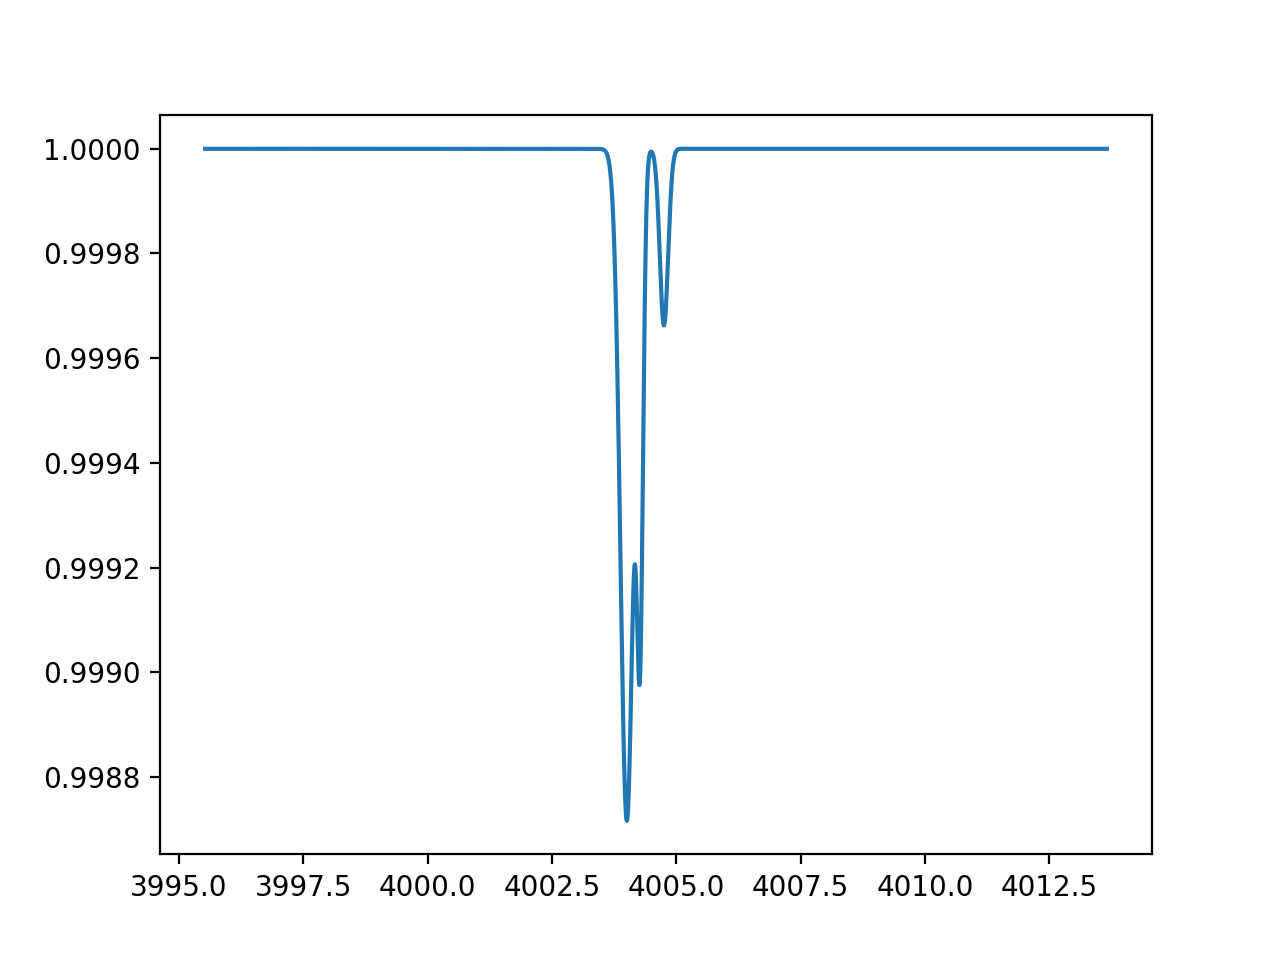

In [59]:
print(spec_mod.fixed)

[print("{:16}: {:e}".format(*x)) for x in zip(spec_mod.param_names, spec_mod.parameters)]

f, ax = plt.subplots()
# ax.plot(dispersion, y)
ax.plot(dispersion, spec_mod(dispersion))

In [60]:
fitter = LevMarLSQFitter() #MCMCFitter()

fit_spec_mod = fitter(spec_mod, dispersion, y, maxiter=2000)
print(fit_spec_mod)

/Users/nearl/anaconda3/envs/spectacle_env/lib/python3.6/site-packages/astropy/units/quantity.py:641: RuntimeWarning: divide by zero encountered in true_divide
  *arrays, **kwargs)
/Users/nearl/projects/spectacle/spectacle/modeling/profiles.py:154: RuntimeWarning: invalid value encountered in multiply
  return special.wofz(x + 1j * y).real


Model: BaseSpectrumModel
Name: Flux
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] | [1] | [2] + ([3] + [4] + [5] | [6])
Components: 
    [0]: <DispersionConvert(center=1334.5323 Angstrom)>

    [1]: <Redshift(z=-0.6666666666666667)>

    [2]: <Linear1D(slope=0.0 1 / Angstrom, intercept=1.0 )>

    [3]: <TauProfile(lambda_0=1334.5323 Angstrom, f_value=0.1278, gamma=288000000.0, v_doppler=1357932.6368228921 cm / s, column_density=68324461940.45171 1 / cm2, delta_v=0.0 cm / s, delta_lambda=0.1353807165796752 Angstrom, name='CII1335')>

    [4]: <TauProfile(lambda_0=1334.5323 Angstrom, f_value=0.1278, gamma=288000000.0, v_doppler=662759.0142119997 cm / s, column_density=22336363425.656406 1 / cm2, delta_v=0.0 cm / s, delta_lambda=0.22410306640153976 Angstrom, name='CII1335')>

    [5]: <TauProfile(lambda_0=1334.5323 Angstrom, f_value=0.1278, gamma=288000000.0, v_doppler=886470.4421063002 cm / s, column_density=11717200506.436562 1 / cm2, delta_v=0.0 cm / s, delta_lambda=

In [61]:
[print("{:16}: {:e}".format(*x)) for x in zip(fit_spec_mod.param_names, fit_spec_mod.parameters)]

center_0        : 1.334532e+03
z_1             : -6.666667e-01
slope_2         : 0.000000e+00
intercept_2     : 1.000000e+00
lambda_0_3      : 1.334532e+03
f_value_3       : 1.278000e-01
gamma_3         : 2.880000e+08
v_doppler_3     : 9.827443e+05
column_density_3: 2.464044e+12
delta_v_3       : -2.524750e+04
delta_lambda_3  : 1.353807e-01
lambda_0_4      : 1.334532e+03
f_value_4       : 1.278000e-01
gamma_4         : 2.880000e+08
v_doppler_4     : 7.338825e+05
column_density_4: 1.235471e+12
delta_v_4       : 2.859164e+04
delta_lambda_4  : 2.241031e-01
lambda_0_5      : 1.334532e+03
f_value_5       : 1.278000e-01
gamma_5         : 2.880000e+08
v_doppler_5     : 9.589378e+05
column_density_5: 6.141018e+11
delta_v_5       : 7.135536e+03
delta_lambda_5  : 3.843660e-01


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

<IPython.core.display.Javascript object>


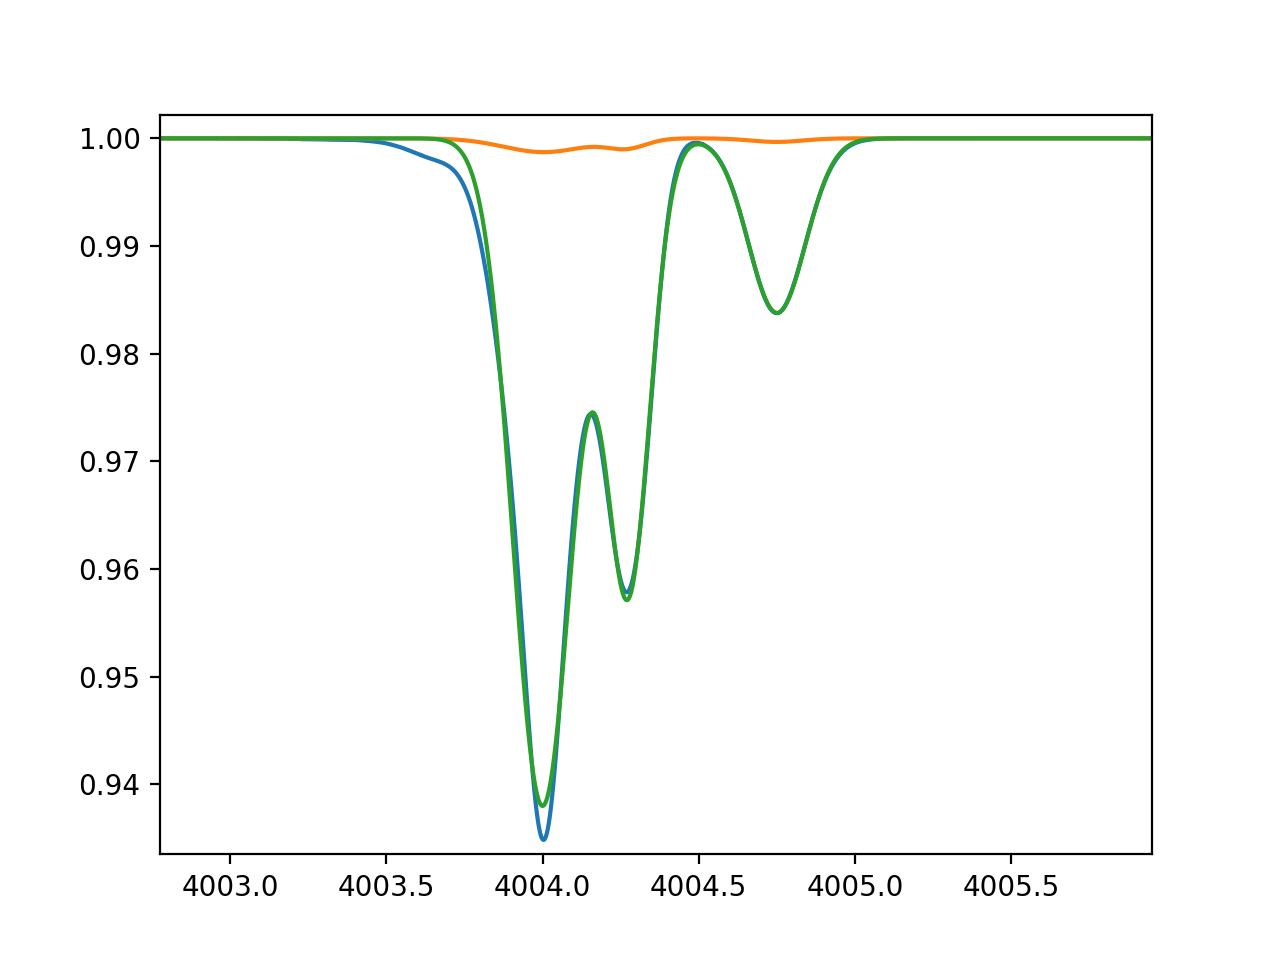

In [62]:
f, ax = plt.subplots()

ax.plot(dispersion, y)
ax.plot(dispersion, spec_mod(dispersion))
ax.plot(dispersion, fit_spec_mod(dispersion))